### Models

#### Model Options
- Linear Regression (or Kernelized Regression)
  - KernelDensity(kernel='linear')
- K-Nearest Neighbors
  - KernelDensity()
- Gaussian Processes
  - KernelDensity(kernel='gaussian')
- Neural Networks
- Random Forest Regressor
- Adaptive or Gradient Boosting Regressor
- "linear", "gaussian", 

In [18]:
import numpy as np
from sklearn.neighbors import KernelDensity
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [19]:
data = "data/train.csv"
df = pd.read_csv(data)

In [20]:
# extract the features & target variable from the dataframe

X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
    # alt method: y = df['target']


#### Data Exploration: Target 

In [21]:
y.head()

y.describe()
# ["count", "mean", "std", "min", "q1", "q2", "q3", "max"]

,target
count,8250.000000
mean,0.867212
std,0.405036
min,-0.000000
25%,0.600000
50%,0.800000
75%,1.100000
max,3.500000


In [22]:
# compute basic descriptive statistics for the target variable
mean = np.mean(y)
median = np.median(y)
std_dev = np.std(y)
min_val = np.min(y)
max_val = np.max(y)
y_range = max_val - min_val

print("Mean:", mean)
print("Median:", median)
print("Standard Deviation:", std_dev)
print("Minimum Value:", min_val)
print("Maximum Value:", max_val)
print("Range:", y_range)


Mean: target    0.867212
dtype: float64
Median: 0.8
Standard Deviation: target    0.405011
dtype: float64
Minimum Value: target   -0.0
dtype: float64
Maximum Value: target    3.5
dtype: float64
Range: target    3.5
dtype: float64


/Users/eleanorbrock/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/Users/eleanorbrock/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/Users/eleanorbrock/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkw

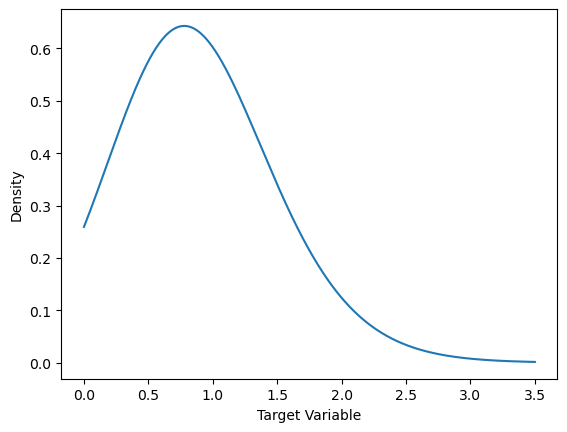

In [23]:
# create a kernel density estimate of the target's distribution
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(y.to_numpy().reshape(-1,1))

# create a set of x-values at which to evaluate the KDE
x_vals = np.linspace(min_val, max_val, 1000).reshape(-1,1)

# get the corresponding y-values by evaluating the KDE at the x-values 
y_vals = np.exp(kde.score_samples(x_vals))

# plot the KDE
plt.plot(x_vals, y_vals)
plt.xlabel('Target Variable')
plt.ylabel('Density')
plt.show()

# Alternative methods
# sns.displot(y, kind="kde")
# sns.kdeplot(y)

#### Data Exploration: Features

In [24]:
X.head()
X.describe()


,acc_rate,track,m,n,current_pitch,current_roll,absoluate_roll,climb_delta,roll_rate_delta,climb_delta_diff,...,time7_delta,time8_delta,time9_delta,time10_delta,time11_delta,time12_delta,time13_delta,time14_delta,omega,set
count,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,...,8250.000000,8.250000e+03,8250.000000,8.250000e+03,8250.000000,8.250000e+03,8250.000000,8250.000000,8250.000000,8250.000000
mean,-11.526061,-12.672970,1.051280,0.060387,0.629371,0.061248,-11.004848,-0.920364,-0.000957,-0.047842,...,-0.000018,-1.212121e-07,-0.000099,4.848485e-07,8.999901,-7.272727e-07,-0.000093,-10.000001,-0.510279,0.021982
std,259.637258,25.675733,0.320703,0.118805,0.313628,0.967274,4.140399,10.334136,0.013203,1.132179,...,0.000113,1.100964e-05,0.000615,6.963359e-05,0.000631,6.030154e-05,0.000613,0.000037,0.257113,0.006961
min,-975.000000,-95.000000,0.216536,-0.530000,-0.420000,-3.000000,-23.000000,-44.000000,-0.080000,-8.800000,...,-0.001000,-1.000000e-03,-0.006000,-2.000000e-03,8.995000,-4.000000e-03,-0.005000,-10.003000,-0.916291,0.012000
25%,-175.000000,-29.000000,0.802519,-0.020000,0.430000,-0.600000,-14.000000,-8.000000,-0.009000,-0.300000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,9.000000,0.000000e+00,0.000000,-10.000000,-0.693147,0.018000
50%,-23.000000,-13.000000,1.020201,0.060000,0.610000,0.200000,-11.000000,-1.000000,-0.001000,-0.100000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,9.000000,0.000000e+00,0.000000,-10.000000,-0.510826,0.020000
75%,157.000000,3.000000,1.258600,0.130000,0.800000,0.700000,-7.000000,6.000000,0.008000,0.200000,...,0.000000,0.000000e+00,0.000000,0.000000e+00,9.000000,0.000000e+00,0.000000,-10.000000,-0.356675,0.023000
max,946.000000,94.000000,2.886371,0.620000,2.580000,2.900000,-3.000000,46.000000,0.056000,8.700000,...,0.000600,0.000000e+00,0.003000,6.000000e-03,9.005000,2.000000e-03,0.007000,-10.000000,0.693147,0.073000


In [28]:
feature_list = X.columns.values.tolist()
# for each in feature_list:
    # same procedure as with target --- for each feature

# Alternative methods?
# sns.displot(y, kind="kde")
# sns.kdeplot(y)
# sns.displot(X, kind="kde")